# Playing Trex Game With Image Processing
Hello everyone, in the last part, we used gestures to perform jump and duck but in this part, we will not use gestures. We will use only some image processing techniques and then let the code play it. But our code will not be any kind of Machine Learning code or algorithms.

## Preliminary Actions
### Import Libraries
We have used everything imported in this code here except `pyautogui` please install it using `pip install pyautogui`. We will use it for getting the screenshot of our screen.

In [5]:
import pyautogui
import numpy as np
import tkinter as tk
import cv2
import matplotlib.pyplot as plt
import keyboard


### Show Function

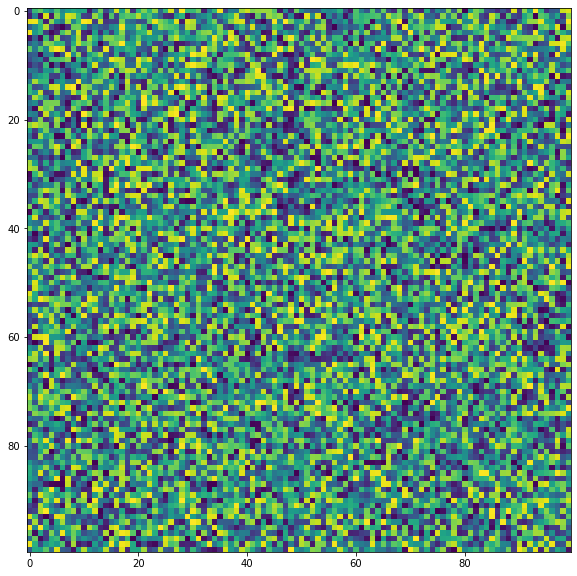

In [6]:
def show(img, fsize=(10,10)):
    figure=plt.figure(figsize=fsize)
    plt.imshow(img)
    plt.show()
show(np.random.randint(0, 255, (100, 100)))


###  Getting Screen Size


In [7]:

root = tk.Tk()

screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()

ssize = (screen_height, screen_width)
ssize

(768, 1366)

## Prepare Basic Templates
In this project, we will do background subtraction for checking if any object is coming ahead. So, first I took a screenshot of my dino game then saved it on my project directory.

![img](chrome_dino.png)

Then I extracted the portion where dino lies, seems like it lies between row 370 to 500 and column 50 to 180. Another 2 things we need is ROIs for checking bottom part and top part. I named `broi` for bottom and `troi` for top. Once cropped these parts, show them.

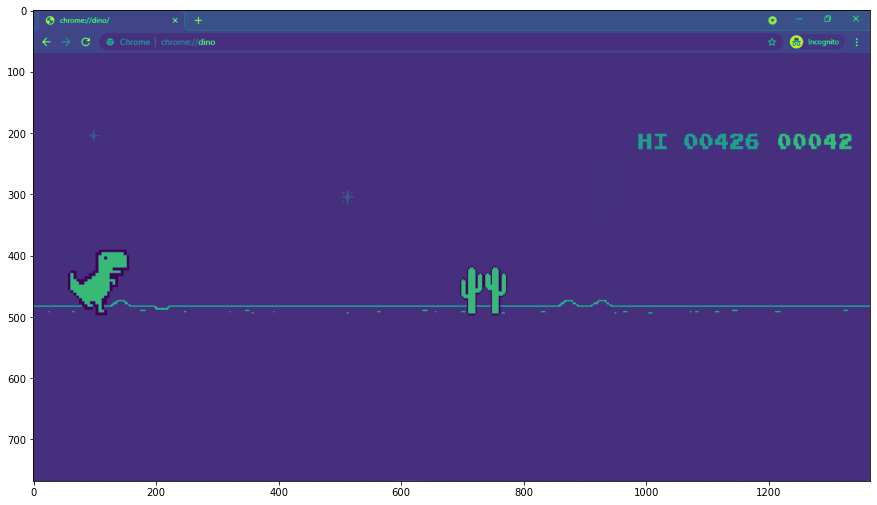

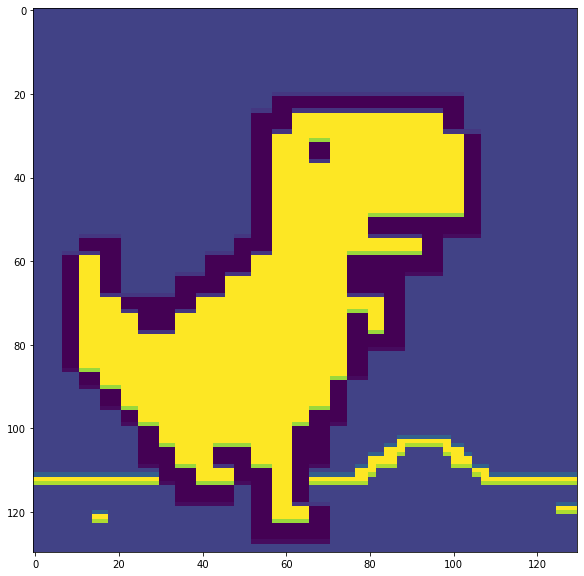

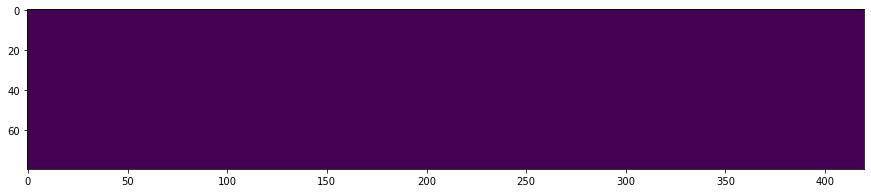

In [8]:
game_window = cv2.imread("chrome_dino.png", 0)
show(game_window, (15, 15))


brr1,brr2,brc1,brc2 = 370, 450, 160, 580
trr1,trr2,trc1,trc2 = 170, 370, 160, 600

troi = game_window[trr1:trr2, trc1:trc2]
broi = game_window[brr1:brr2, brc1:brc2]
dino = game_window[370:500, 50:180]
show(dino)
show(broi, fsize=(15, 15))    

## Image Processing to Play Dino
* Take the resolution of screen.

```python
resolution = ssize
```
* Start a new OpenCV window and name it `live` where we will make our screenshot live. Also resize it.
```python
cv2.namedWindow('live', cv2.WINDOW_NORMAL)
cv2.resizeWindow("live", 480, 270)
```
* Start variables `fc` for frame count and `increase_every` as threshold to increase ROI in ever that frame.
```python
fc = 0
increase_every = 7
```
* Start a main loop.
```python
while True:
```
* Take screenshot.
```python
    img = pyautogui.screenshot()
```
* Convert image to array and then to Grayscale image.
```python            
    frame = np.array(img)
    gframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
```
* Take ROIs, `frame_roi` as ROI from each frame and `broi` as ROI from default image.
```python
    frame_roi = gframe[brr1:brr2, brc1:brc2]
    broi = game_window[brr1:brr2, brc1:brc2]
```
* Check how much of dino is found in frame. Also define a threshold and get location where threshold matches. Something like a mask.
```python
    res = cv2.matchTemplate(gframe, dino, cv2.TM_CCOEFF_NORMED)
    
    th = 0.5
    w, h = dino.shape
    loc = np.where(res>=th)
```
* If the length of first value of loc is greater or equal to 1 then we suppose that we are currently in the trex game window. Else we will not play a game. 
```python
    if len(loc[0]>=1):
```
* If our frame count is equal to increase every, which means we should increase ROIs now. Then we will make frame count to 0 again and increase right side of ROI by 1 column. Also we will check if it exceeds our max column numbers. We then take ROIs again.
```python
        if fc==increase_every:
            fc = 0
            brc2 += 1
            print("Increased brc2 to: ", brc2)
            if brc2>resolution[1]:
                brc2=resolution[1]
            broi = game_window[brr1:brr2, brc1:brc2]
            frame_roi = gframe[brr1:brr2, brc1:brc2]
```
* Check if the dino is around 20 pixels far from 370 and if it is then we will check if we need to jump or not. The 370 here depends on my screenshot image size and screen resolution. The value 370 depends on the width of the screen. We then take an absolute difference between `broi` and `frame_roi`. If the value is true, then we find absolute difference and then apply strict normalization. Which simply tells us that the similar parts will be 0 in the result and dissimilar will be 255. 
```python
        if np.abs(loc[0].max()-370)<=20:
            diff = cv2.absdiff(frame_roi.astype(np.float32), broi.astype(np.float32)).astype(np.uint8)

            diff[diff<50] = 0
            diff[diff>=50] = 255
```
* We then check for the number of white pixels. White pixels represents that something is not as usual here. Thus we conclude it as an object. But again, if there are more than 100 white pixels, then we will jump. Because we knew that there is an object ahead. Again 100 depends on the screen size. Then we increase the frame count. Just to see the result, we will view the difference.
```python
            if (diff==255).sum() > 100:
                keyboard.press_and_release("space")
                fc+=1
                
            cv2.imshow("diff", diff)
```
* Else, which means dino has not been found, we will not do anything but reset the ROI coordinates.
```python
    else:
        brr1,brr2,brc1,brc2 = 370, 450, 160, 520
```    

* Finally, show each frames and then wait for escape key.

```python
    cv2.imshow("live", frame)
    
    
    if cv2.waitKey(1) &0xFF == 27:
        break
cv2.destroyAllWindows()
```


## Complete Code

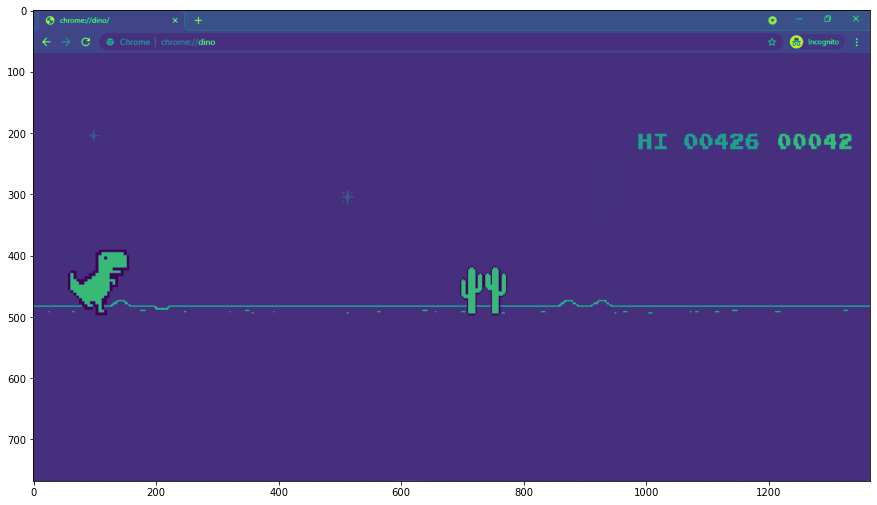

Increased brc2 to:  521
Increased brc2 to:  522
Increased brc2 to:  523
Increased brc2 to:  524
Increased brc2 to:  525
Increased brc2 to:  526
Increased brc2 to:  527
Increased brc2 to:  528
Increased brc2 to:  529
Increased brc2 to:  530
Increased brc2 to:  521
Increased brc2 to:  522
Increased brc2 to:  523
Increased brc2 to:  524
Increased brc2 to:  525
Increased brc2 to:  526
Increased brc2 to:  527
Increased brc2 to:  528
Increased brc2 to:  529
Increased brc2 to:  530
Increased brc2 to:  531
Increased brc2 to:  532
Increased brc2 to:  533
Increased brc2 to:  534
Increased brc2 to:  535
Increased brc2 to:  536
Increased brc2 to:  537


In [9]:
game_window = cv2.imread("chrome_dino.png", 0)
show(game_window, (15, 15))

brr1,brr2,brc1,brc2 = 370, 450, 160, 520
trr1,trr2,trc1,trc2 = 170, 370, 160, 600

troi = game_window[trr1:trr2, trc1:trc2]
broi = game_window[brr1:brr2, brc1:brc2]
dino = game_window[370:500, 50:180]
# show(dino)
# show(roi, fsize=(15, 15))    


resolution = ssize 
cv2.namedWindow('live', cv2.WINDOW_NORMAL)
cv2.resizeWindow("live", 480, 270)

fc = 0
increase_every = 7

while True:
    img = pyautogui.screenshot()
    
            
    frame = np.array(img)
    gframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    frame_roi = gframe[brr1:brr2, brc1:brc2]
    broi = game_window[brr1:brr2, brc1:brc2]
    
    res = cv2.matchTemplate(gframe, dino, cv2.TM_CCOEFF_NORMED)
    
    th = 0.5
    w, h = dino.shape
    loc = np.where(res>=th)
    #print(loc)
    if len(loc[0]>=1):
        game_stat = "start"
        if fc==increase_every:
            fc = 0
            brc2 += 1
            print("Increased brc2 to: ", brc2)
            if brc2>resolution[1]:
                brc2=resolution[1]
            broi = game_window[brr1:brr2, brc1:brc2]
            frame_roi = gframe[brr1:brr2, brc1:brc2]
                
        if np.abs(loc[0].max()-370)<=20:
            diff = cv2.absdiff(frame_roi.astype(np.float32), broi.astype(np.float32)).astype(np.uint8)

            diff[diff<50] = 0
            diff[diff>=50] = 255

            if (diff==255).sum() > 100:
                keyboard.press_and_release("space")
                fc+=1
                
            cv2.imshow("diff", diff)
    else:
        game_state="pause"
        brr1,brr2,brc1,brc2 = 370, 450, 160, 520
    
    cv2.imshow("live", frame)
    
    
    if cv2.waitKey(1) &0xFF == 27:
        break
cv2.destroyAllWindows()

## Finally
This is all for this part and I have not written a code for ducking part. I hope you can try that feature on your own. If you found some errors or problems please let us know. 

* [GitHub]()
* [YouTube]()